In [57]:
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import numpy as np
import random

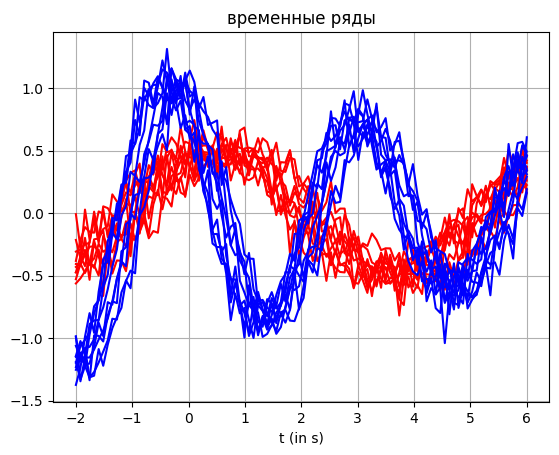

In [56]:
time_index = np.linspace(-2, 6, 100)

tseries_list = {'Time': time_index}
d = np.random.random(size=10)

N = 10
f0 = 0.3

rand = np.random.random(size=10)

# пульс с использованием гауссовой функции
for i in range(N):
    tseries_list["Tg"+str(i)] = 0.5 * np.sin(time_index + rand[i] + 0.5)
    noise1 = np.random.normal(0, 0.1, 100)
    tseries_list["Tg"+str(i)] = tseries_list["Tg"+str(i)] + noise1

# сигнал с экспоненциальным затуханием
for i in range(N):
    noise1 = np.random.normal(0, 0.1, 100)
    tseries_list["Texp"+str(i)]= np.exp(-0.1*time_index) * np.cos(2*np.pi*f0*time_index + d[i]) + noise1

for i in range(N):
    plt.plot(time_index, tseries_list["Tg"+str(i)], '-r')
for i in range(N):
    plt.plot(time_index, tseries_list["Texp"+str(i)], '-b')

plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()
plt.show()

In [55]:
def generate_shapletes_candidate(ts_i, l):
    shapletes = []
    for i in range(len(ts_i) - l + 1):
        shapletes.append(ts_i[i:i+l])
    return shapletes

def distance_shapletes(ts_i, l):
    dist = []
    for i in ts_i:
        dist.append(euclidean(i, l))
    return dist

def evaluate_candidate_shapletes(subs, d_s):
    return 0

def discovery_shapletes(tseries_list, min = 3, max = 100, r = 200, quality = 0.05):
    rShapletes = []
    numC = 2
    p = r / numC

    for ts_i in tseries_list:
        shapletes = []
        for l in range(min, max + 1):
            w_i_l = generate_shapletes_candidate(ts_i, l)
            for subs in w_i_l:
                d_s = distance_shapletes(subs, w_i_l)
                quality = evaluate_candidate_shapletes(subs, d_s)
                shapletes.append({subs: quality})


    return shapletes